In [2]:
import pandas as pd
import pickle

In [3]:
with open('../models/dataframes/df_with_best_shops.p', 'rb') as read_file:
    df = pickle.load(read_file)

In [4]:
df.head(20)

,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,closest_el,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
0,101001000,128,185,2,Jarvis,0.009465,1347.408038,0
1,101001001,71,180,3,Jarvis,0.007069,1347.408038,0
2,101001002,45,184,3,Jarvis,0.006355,1347.408038,0
3,101001003,335,217,4,Jarvis,0.005944,1347.408038,0
4,101002000,152,201,3,Howard,0.005396,5357.830394,0
5,101002001,45,220,3,Howard,0.004499,5357.830394,0
6,101002002,363,273,4,Howard,0.005295,5357.830394,0
7,101002003,42,216,3,Howard,0.005318,5357.830394,0
8,101002004,154,222,3,Howard,0.005039,5357.830394,0
9,101002005,151,254,3,Howard,0.003885,5357.830394,0


## Kmeans

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [43]:
blocks = df['CENSUS BLOCK']

## num_clusters = 8

In [44]:
num_clusters = 8
km = KMeans(n_clusters=num_clusters)
X = df.drop('CENSUS BLOCK', axis=1)
X = X.drop('closest_el', axis=1)
X = StandardScaler().fit_transform(X)

km.fit(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
from collections import defaultdict

In [12]:
label_dict = defaultdict(int)
for block, label in zip(blocks, km.labels_):
    label_dict[label] += 1

In [13]:
label_dict

defaultdict(int,
            {5: 23359,
             6: 612,
             3: 6370,
             0: 8420,
             4: 135,
             1: 6696,
             2: 662,
             7: 1})

In [18]:
km.labels_

array([5, 5, 5, ..., 0, 0, 0], dtype=int32)

In [76]:
for block, label in zip(blocks, km.labels_):
    if label == 6:
        print(block)

4313011000
4313011001
4313011003
4313011005
4313011006
4313011007
4313011008
4313011009
4313011010
4313011012
4313011013
4313011014
4313013015
4313021007
4313021012
4313022000
4313022003
4313022004
4313023000
4313023001
4313023012
4313023013
4313023014
4313023015
4314001006
4314002004
4314002005
4314002006
4314002008
4314002009
4314002010
4314003002
4314003003
4314003004
4314003009
4314003012
4314003013
4601001000
4601001003
4601001004
4601001005
4601001007
4601001008
4601001009
4601001010
4601001012
4601001013
4601001014
4601001015
4601001016
4601001017
4601001018
4601001019
4601001020
4601001021
4601001022
4601001023
4601001024
4601001025
4601001035
4601001036
4601001037
4601002000
4601002001
4601002002
4601002003
4601002004
4601002005
4601002006
4601002007
4601002008
4601002009
4601002010
4601002011
4601002012
4601002013
4601002014
4601002015
4601002016
4601003000
4601003001
4601003002
4601003003
4601003004
4601003005
4601003006
4601003007
4601003008
4601003009
4601003010
4601003011

<BarContainer object of 8 artists>

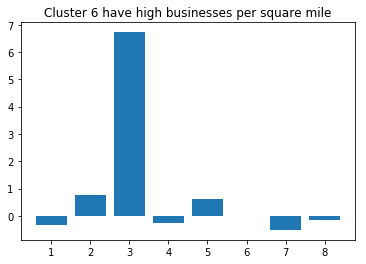

In [79]:
bus_persq_mi = [center[1] for center in km.cluster_centers_]
clusters = list(range(1, num_clusters+1))
len(coffee_shop_count_centers)
plt.title('Cluster 3 have high businesses per square mile')
plt.bar(clusters,bus_persq_mi)

In [164]:
cluster_1 = []
for block,label in zip(X,km.labels_):
    if label == 1:
        cluster_1.append(block)
        
len(cluster_1)
    

6472

In [28]:
def cluster_hist(cluster):
    fig,((ax1,ax2),(ax3, ax4),(ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
    cluster_pop = [pop[0] for pop in cluster]
    ax1.hist(cluster_pop)
    ax1.set_title('Population Cluster')

    cluster_bus = [pop[1] for pop in cluster]
    ax2.set_title('Business Cluster')
    ax2.hist(cluster_bus)

    cluster_cof = [pop[2] for pop in cluster]
    ax3.set_title('Coffee Cluster')
    ax3.hist(cluster_cof)

    cluster_toel = [pop[3] for pop in cluster]
    ax4.set_title('Distance to El Cluster')
    ax4.hist(cluster_toel)

    cluster_elrides = [pop[4] for pop in cluster]
    ax5.set_title('Avg. Ridership on Closest El')
    ax5.hist(cluster_elrides)
    
    cluster_best = [pop[5] for pop in cluster]
    ax6.set_title('Best coffee shop very close')
    ax6.hist(cluster_best)

In [31]:
cluster_2 = []
for block,label in zip(X,km.labels_):
    if label == 2:
        cluster_2.append(block)
        
len(cluster)


662

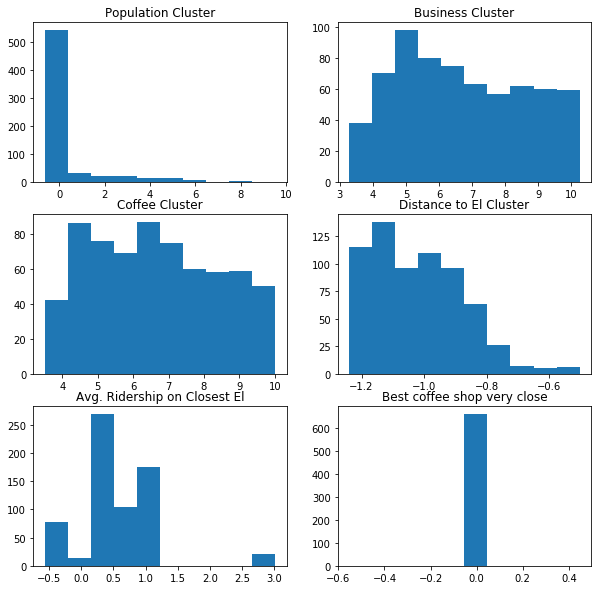

In [32]:
cluster_hist(cluster_2)

In [26]:
cluster_4 = []
for block,label in zip(X,km.labels_):
    if label == 4:
        cluster_4.append(block)
        
len(cluster_4)


135

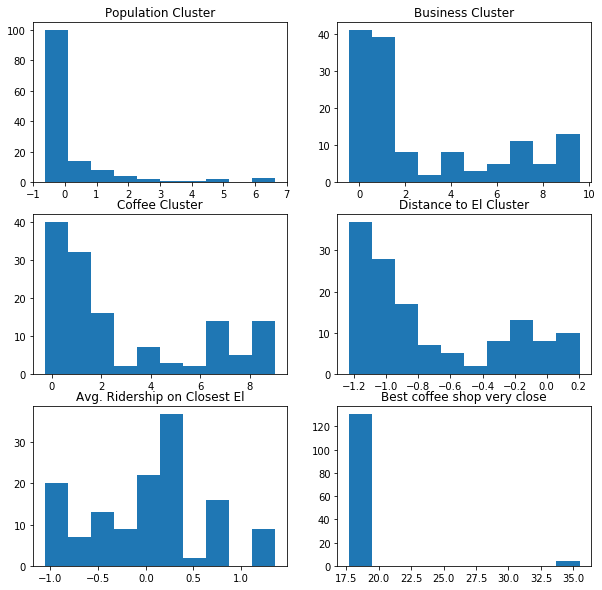

In [29]:
cluster_hist(cluster_4)

In [22]:
cluster_5 = []
for block,label in zip(X,km.labels_):
    if label == 5:
        cluster_3.append(block)
        
print(len(cluster_3))
cluster_hist(cluster_3)


NameError: name 'cluster_3' is not defined

Cluster_3 is interesting. It has an ok distance to el, small relative business and coffeeshop count, and some that are close to els with hi average ridership.

## Num Clusters == 5

In [56]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
X = df.drop(['CENSUS BLOCK','closest_el','best_coffee_shop'], axis=1)

X = StandardScaler().fit_transform(X)

km.fit(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [57]:
label_dict = defaultdict(int)
for block, label in zip(blocks, km.labels_):
    label_dict[label] += 1
label_dict

defaultdict(int, {4: 27723, 2: 598, 0: 10325, 1: 6806, 3: 803})

In [97]:
km.cluster_centers_

array([[-9.27954367e-02, -3.15443070e-01, -3.30507472e-01,
         8.65564960e-01, -3.53452981e-01],
       [-2.75896435e-01, -4.84845996e-01, -3.62855466e-01,
         1.13370969e+00,  1.98446321e+00],
       [ 5.19189798e+00,  6.31304128e-01,  7.74526873e-01,
        -6.44160986e-01, -1.52935668e-02],
       [ 5.33099430e-03,  6.31207953e+00,  6.26876581e+00,
        -1.00276859e+00,  5.64813899e-01],
       [-1.00574487e-02,  4.00175399e-02,  1.38487249e-02,
        -5.57678063e-01, -3.71421451e-01]])

In [113]:
def cluster_df(cluster_label):
    label_block = []
    for block, label in zip(blocks,km.labels_):
        if label==cluster_label:
            label_block.append(block)

    df_best_shop_clust = df[df['CENSUS BLOCK'].isin(label_block)]
    print('Cluster %s has %s records' %(cluster_label, len(label_block)))
    print('''Cluster 0 cluster centers are:
          Total_pop: %s
          Business per sqmi: %s
          Coffee Shops per sqmi: %s
          Distance to El: %s
          Closest El Daily Riders: %s
          ''' %(km.cluster_centers_[cluster_label][0],km.cluster_centers_[cluster_label][1],
               km.cluster_centers_[cluster_label][2],km.cluster_centers_[cluster_label][3],
               km.cluster_centers_[cluster_label][4]))
    return df_best_shop_clust

In [133]:
df_cluster_0 = cluster_df(0)
print(df_cluster_0[df_cluster_0.best_coffee_shop!=0].shape)
df_cluster_0.describe()

Cluster 0 has 10325 records
Cluster 0 cluster centers are:
          Total_pop: -0.09279543674401967
          Business per sqmi: -0.3154430699435471
          Coffee Shops per sqmi: -0.33050747179117335
          Distance to El: 0.8655649601487422
          Closest El Daily Riders: -0.353452980951387
          
(0, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,1.032500e+04,10325.000000,10325.000000,10325.000000,10325.000000,10325.000000,10325.0
mean,4.666874e+09,49.790605,245.039903,1.250751,0.057502,2887.711604,0.0
std,2.435050e+09,41.424529,133.685964,1.338048,0.017595,1928.867762,0.0
min,2.020010e+08,0.000000,1.000000,0.000000,0.032834,337.524862,0.0
25%,1.904011e+09,20.000000,151.000000,0.000000,0.043464,1384.259708,0.0
50%,5.607002e+09,45.000000,209.000000,1.000000,0.053142,1554.969637,0.0
75%,6.505002e+09,69.000000,316.000000,2.000000,0.067282,4143.510018,0.0
max,9.801001e+09,351.000000,661.000000,11.000000,0.118475,6487.262606,0.0


In [137]:
df_cluster_1 = cluster_df(1)
print(df_cluster_1[df_cluster_1.best_coffee_shop!=0].shape)
df_cluster_1.describe()

Cluster 1 has 6806 records
Cluster 0 cluster centers are:
          Total_pop: -0.2758964353072193
          Business per sqmi: -0.4848459959234489
          Coffee Shops per sqmi: -0.36285546604676305
          Distance to El: 1.1337096942917506
          Closest El Daily Riders: 1.9844632065174304
          
(0, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,6.806000e+03,6806.000000,6806.000000,6806.000000,6806.000000,6806.000000,6806.0
mean,5.960984e+09,33.072142,123.736115,0.653982,0.064767,10576.701565,0.0
std,1.237763e+09,34.440475,100.182552,2.225235,0.036045,419.035679,0.0
min,7.010130e+08,0.000000,1.000000,0.000000,0.000286,6487.262606,0.0
25%,5.001001e+09,4.000000,79.000000,0.000000,0.035675,10624.839242,0.0
50%,5.305021e+09,29.000000,117.000000,0.000000,0.059881,10624.839242,0.0
75%,7.304003e+09,47.000000,151.000000,1.000000,0.087611,10624.839242,0.0
max,8.388002e+09,369.000000,1020.000000,24.000000,0.173106,10624.839242,0.0


In [135]:
df_cluster_2 = cluster_df(2)
print(df_cluster_2[df_cluster_2.best_coffee_shop!=0].shape)
df_cluster_2.describe()

Cluster 2 has 598 records
Cluster 0 cluster centers are:
          Total_pop: 5.19189797780519
          Business per sqmi: 0.6313041275453771
          Coffee Shops per sqmi: 0.7745268732170845
          Distance to El: -0.6441609862913208
          Closest El Daily Riders: -0.015293566771435802
          
(6, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,5.980000e+02,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,2.636694e+09,533.665552,924.316054,21.662207,0.016577,3989.163851,0.010033
std,2.781203e+09,446.025717,868.106574,22.602892,0.017445,2578.355707,0.099747
min,1.010010e+08,226.000000,5.000000,0.000000,0.000543,337.524862,0.000000
25%,6.090010e+08,356.250000,367.500000,4.000000,0.005889,2105.551772,0.000000
50%,8.140270e+08,440.000000,675.000000,17.000000,0.011391,3845.434789,0.000000
75%,3.982752e+09,607.000000,1061.000000,26.000000,0.019115,5045.052583,0.000000
max,8.439004e+09,9798.000000,4359.000000,114.000000,0.140084,10624.839242,1.000000


In [138]:
df_cluster_3 = cluster_df(3)
print(df_cluster_3[df_cluster_3.best_coffee_shop!=0].shape)
df_cluster_3.describe()

Cluster 3 has 803 records
Cluster 0 cluster centers are:
          Total_pop: 0.005330994296295905
          Business per sqmi: 6.31207953262384
          Coffee Shops per sqmi: 6.268765811253326
          Distance to El: -1.002768585930871
          Closest El Daily Riders: 0.564813898652579
          
(44, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,8.030000e+02,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,3.489965e+09,58.764633,4991.048568,122.932752,0.006842,5908.172794,0.059776
std,3.141596e+09,140.043512,1490.082108,35.314977,0.004325,2143.001335,0.257387
min,8.100010e+08,0.000000,2450.000000,62.000000,0.000416,2185.617864,0.000000
25%,8.170010e+08,0.000000,3714.500000,91.000000,0.003115,4865.041910,0.000000
50%,2.801002e+09,0.000000,4855.000000,123.000000,0.006457,5644.732219,0.000000
75%,8.390003e+09,8.000000,6254.500000,151.000000,0.009669,7864.998619,0.000000
max,8.423002e+09,929.000000,7816.000000,192.000000,0.022260,13972.553730,2.000000


In [139]:
df_cluster_3[df_cluster_3.best_coffee_shop!=1]

,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,closest_el,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
4582,810001000,0,3218,74,Clark/Division,0.001815,6600.007061,0
4584,810001002,5,3071,67,Clark/Division,0.002602,6600.007061,0
4585,810001003,0,3011,65,Clark/Division,0.003030,6600.007061,0
4586,810002000,0,3928,86,Clark/Division,0.004804,6600.007061,0
4587,810002001,100,4043,85,Clark/Division,0.004435,6600.007061,0
4588,810002002,28,4065,94,Clark/Division,0.005394,6600.007061,0
4589,810002003,42,4155,90,Clark/Division,0.005189,6600.007061,0
4590,810002004,9,4363,101,Clark/Division,0.006301,6600.007061,0
4591,810002005,478,4589,109,Clark/Division,0.005389,6600.007061,0
4592,810002006,0,4267,103,Clark/Division,0.005615,6600.007061,0


In [90]:
df_cluster_4 = cluster_df(4)
df_cluster_4[df_cluster_4.best_coffee_shop!=0].shape

Cluster 4 has 27723 records


(85, 8)

In [65]:
label_2_block = []
for block, label in zip(blocks,km.labels_):
    if label==2:
        label_2_block.append(block)

df_best_shop_clust = df[df['CENSUS BLOCK'].isin(label_2_block)]
df_best_shop_clust.head()

,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,closest_el,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
3,101001003,335,217,4,Jarvis,0.005944,1347.408038,0
6,101002002,363,273,4,Howard,0.005295,5357.830394,0
60,102012015,413,358,3,Howard,0.009231,5357.830394,0
69,102012024,378,407,3,Howard,0.011666,5357.830394,0
102,102021004,406,375,6,Howard,0.003803,5357.830394,0


In [64]:
df_best_shop_clust[df_best_shop_clust.best_coffee_shop!=0].shape

(6, 8)

## Drop Closest El Daily Riders

In [143]:
X = df.drop(columns=['CENSUS BLOCK', 'closest_el', 'closest_el_daily_riders', 'best_coffee_shop'], axis=1)

X = StandardScaler().fit_transform(X)
num_clusters = 5
km = KMeans(n_clusters=num_clusters)

km.fit(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [147]:
def cluster_df_4center(cluster_label):
    label_block = []
    for block, label in zip(blocks,km.labels_):
        if label==cluster_label:
            label_block.append(block)

    df_best_shop_clust = df[df['CENSUS BLOCK'].isin(label_block)]
    print('Cluster %s has %s records' %(cluster_label, len(label_block)))
    print('''Cluster 0 cluster centers are:
          Total_pop: %s
          Business per sqmi: %s
          Coffee Shops per sqmi: %s
          Distance to El: %s
          ''' %(km.cluster_centers_[cluster_label][0],km.cluster_centers_[cluster_label][1],
               km.cluster_centers_[cluster_label][2],km.cluster_centers_[cluster_label][3]))
    return df_best_shop_clust

In [149]:
df_cluster_0 = cluster_df_4center(0)
print(df_cluster_0[df_cluster_0.best_coffee_shop!=0].shape)
df_cluster_0.describe()

Cluster 0 has 7203 records
Cluster 0 cluster centers are:
          Total_pop: 0.09502753840716202
          Business per sqmi: 0.7126329570666552
          Coffee Shops per sqmi: 0.8306323079364931
          Distance to El: -0.7555264130294368
          
(72, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,7.203000e+03,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000
mean,2.859339e+09,67.000694,981.084132,22.655144,0.013546,3609.850008,0.009996
std,3.013490e+09,64.929112,398.219798,11.055246,0.009439,2004.401198,0.099485
min,1.020220e+08,0.000000,350.000000,4.000000,0.000101,561.752072,0.000000
25%,6.040030e+08,12.000000,736.000000,15.000000,0.006433,1986.489107,0.000000
50%,2.203001e+09,54.000000,866.000000,20.000000,0.011339,3272.478661,0.000000
75%,3.106003e+09,98.000000,1113.000000,26.000000,0.018062,4600.944913,0.000000
max,8.437001e+09,315.000000,3234.000000,79.000000,0.046526,10281.119282,1.000000


In [150]:
df_cluster_1 = cluster_df_4center(1)
print(df_cluster_1[df_cluster_1.best_coffee_shop!=0].shape)
df_cluster_1.describe()

Cluster 1 has 9498 records
Cluster 0 cluster centers are:
          Total_pop: -0.17682956271681013
          Business per sqmi: -0.4331178005405593
          Coffee Shops per sqmi: -0.3541154034536062
          Distance to El: 1.6128008493805288
          
(0, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,9.498000e+03,9498.000000,9498.000000,9498.000000,9498.000000,9498.000000,9498.0
mean,5.670977e+09,42.098758,160.766898,0.815330,0.077765,5964.799346,0.0
std,1.712553e+09,38.373655,100.447121,1.177341,0.022980,4216.738659,0.0
min,9.010010e+08,0.000000,1.000000,0.000000,0.050347,337.524862,0.0
25%,5.102003e+09,13.000000,95.000000,0.000000,0.060289,1554.969637,0.0
50%,5.609003e+09,38.000000,146.000000,0.000000,0.071109,5045.052583,0.0
75%,7.003024e+09,59.000000,202.000000,1.000000,0.089240,10624.839242,0.0
max,9.801001e+09,377.000000,557.000000,6.000000,0.173106,10624.839242,0.0


In [151]:
df_cluster_2 = cluster_df_4center(2)
print(df_cluster_2[df_cluster_2.best_coffee_shop!=0].shape)
df_cluster_2.describe()

Cluster 2 has 717 records
Cluster 0 cluster centers are:
          Total_pop: 0.026501623739989755
          Business per sqmi: 6.668711502880754
          Coffee Shops per sqmi: 6.6002356589620685
          Distance to El: -1.021354408286017
          
(43, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,7.170000e+02,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,3.559783e+09,60.701534,5246.435146,129.044630,0.006338,5943.273335,0.065551
std,3.174136e+09,144.032556,1368.116609,32.323577,0.003901,2202.726722,0.269282
min,8.100010e+08,0.000000,2821.000000,72.000000,0.000416,2185.617864,0.000000
25%,8.170010e+08,0.000000,4113.000000,101.000000,0.002992,4865.041910,0.000000
50%,2.801002e+09,0.000000,5141.000000,128.000000,0.005732,5644.732219,0.000000
75%,8.391001e+09,8.000000,6447.000000,156.000000,0.009174,7864.998619,0.000000
max,8.423002e+09,929.000000,7816.000000,192.000000,0.020409,13972.553730,2.000000


In [152]:
df_cluster_3 = cluster_df_4center(3)
print(df_cluster_3[df_cluster_3.best_coffee_shop!=0].shape)
df_cluster_3.describe()

Cluster 3 has 28286 records
Cluster 0 cluster centers are:
          Total_pop: -0.07119966021027324
          Business per sqmi: -0.21714736700638942
          Coffee Shops per sqmi: -0.2748034296940212
          Distance to El: -0.3109942520063583
          
(15, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,2.828600e+04,28286.000000,28286.000000,28286.000000,28286.000000,28286.000000,28286.000000
mean,4.659192e+09,51.753659,315.395602,2.276957,0.025601,3472.973404,0.000530
std,2.770050e+09,50.533797,164.885827,2.879259,0.012271,2955.829709,0.023022
min,1.010010e+08,0.000000,1.000000,0.000000,0.000286,337.524862,0.000000
25%,2.004012e+09,9.000000,186.000000,0.000000,0.016236,1151.314667,0.000000
50%,4.804005e+09,42.000000,272.000000,1.000000,0.024473,2256.840853,0.000000
75%,7.111002e+09,77.000000,444.000000,3.000000,0.034656,5357.830394,0.000000
max,9.800001e+09,323.000000,885.000000,18.000000,0.054381,10624.839242,1.000000


In [153]:
df_cluster_4 = cluster_df_4center(4)
print(df_cluster_4[df_cluster_4.best_coffee_shop!=0].shape)
df_cluster_4.describe()

Cluster 4 has 551 records
Cluster 0 cluster centers are:
          Total_pop: 5.427394616369717
          Business per sqmi: 0.6247028971546458
          Coffee Shops per sqmi: 0.7702009800300295
          Distance to El: -0.6326039706996023
          
(5, 8)


,CENSUS BLOCK,TOTAL POPULATION,business_per_sqmi,coffee_per_sqmi,man_dist_to_el,closest_el_daily_riders,best_coffee_shop
count,5.510000e+02,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,2.635088e+09,554.829401,918.279492,21.546279,0.016879,4000.937422,0.009074
std,2.754522e+09,458.543532,892.919694,23.345802,0.017660,2605.994268,0.094913
min,1.010010e+08,310.000000,5.000000,0.000000,0.000543,337.524862,0.000000
25%,6.090020e+08,371.500000,360.000000,4.000000,0.005954,2105.551772,0.000000
50%,8.140320e+08,457.000000,663.000000,16.000000,0.011666,3845.434789,0.000000
75%,4.008002e+09,626.500000,1028.500000,26.000000,0.019392,5045.052583,0.000000
max,8.439004e+09,9798.000000,4359.000000,114.000000,0.140084,10624.839242,1.000000
